# Optimización de producción de nanopartículas

## Objetivos

### Objetivo general:

> - Maximizar la producción de nanopartículas aprovechando los recursos disponibles mediante programación lineal.

### Objetivos específicos:
> - Aplicar los conocimientos vistos en clase para problemas reales relacionados a mi carrera.
> - Aplicar técnicas de programación lineal para resolver el modeloo.
> - Analizar gráficamente la región factible y la solución óptima.
> - Lograr


## Modelo que representa el problema

### Descripción del problema

 Se busca maximizar la producciónn de nanopartículas sabiendo que la producción mediante método químico tiene diferente características a la producción por método biológico.

 Cada lote por método químico requiere $4\,\mathrm{g}$ de precursor metálico,  $2\,\mathrm{g}$ de estabilizante y  $3\,\mathrm{h}$ de producción, mientras que cada lote por método biológico requiere  $2\,\mathrm{g}$ de precursor metálico, $3\,\mathrm{g}$ de estabilizante y  $5\,\mathrm{h}$ de producción. La producción esta sujeta a la disponibilidad de  $40\,\mathrm{g}$ de precursor metálico,  $30\,\mathrm{g}$ de estabilizante y un un total de  $50\,\mathrm{h}$ de producción.

### Función objetivo:


 La función objetivo $(Z)$ representa la producción de nanopartículas que se busca maximizar.

 $$
Z=5x_1+3x_2
 $$
Donde:

$x_1$ son los lotes producidos por método químico

$x_2$ son los lotes producidos por método biológico  

### Restricciones del Modelo:

> - Con ambos métodos se debe usar menos de 40 gramos de precursor metálico.
$$
4x_1+2x_2\leq40
$$

> - Con ambos métodos se debe usar menor de 30 gramos de estabilizante
$$
2x_1+3x_2\leq30
$$

> - El tiempo de producción no puede superar 50 horas
$$
3x_1+5x_2\leq50
$$

> - No se puede producir un número negativo de lotes
$$
x_1+x_2≥0
$$


## Solución del problema de optimización

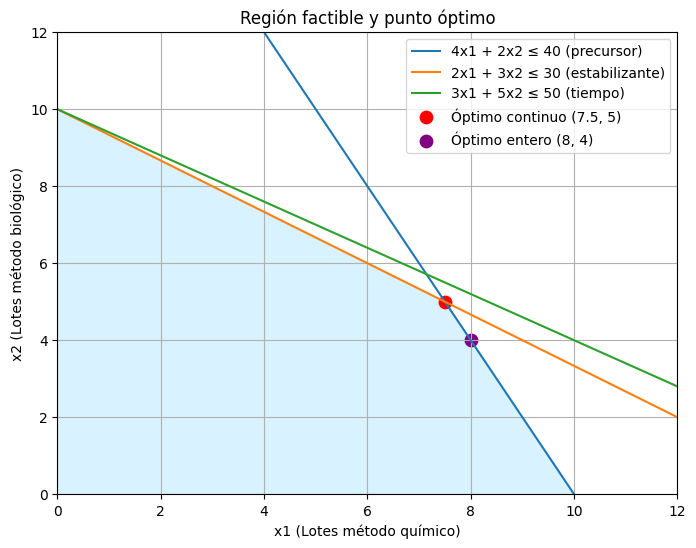

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

def Percursor(x):
    # Restricción1: x1 usa 4g, x2 usa 2g y se tienen 40.
    # 4x1 + 2x2 <= 40 → x2 = (40 - 4x1)/2
    return (40 - 4*x) / 2

def Estabilizante(x):
    # Restricción2: x1 usa 2g, x2 usa 3g y se tienen 30g.
    # 2x1 + 3x2 <= 30 → x2 = (30 - 2x1)/3
    return (30 - 2*x) / 3

def Tiempo(x):
    # Restricción3: x1 tarda 3 horas, x2 5 horas y solo se tienen 50.
    # 3x1 + 5x2 <= 50 → x2 = (50 - 3x1)/5
    return (50 - 3*x) / 5

#Optimización del modelo con restricciones
c=np.array([-5,-3])
a=np.array([[4,2],[2,3],[3,5]])
b=np.array([40,30,50])

sol=opt.linprog(c,a,b)

# Restricciones
x1 = np.linspace(0, 12, 300)

# Ecuaciones de restricción (resueltas para x2)
x2_precursor = (40 - 4*x1)/2      # 4x1 + 2x2 = 40
x2_estabilizante = (30 - 2*x1)/3  # 2x1 + 3x2 = 30
x2_tiempo = (50 - 3*x1)/5         # 3x1 + 5x2 = 50

# Región factible: puntos que cumplen todas las restricciones
x2_region = np.minimum.reduce([x2_precursor, x2_estabilizante, x2_tiempo])
x2_region = np.maximum(0, x2_region)  # no negativo

# Graficar restricciones
plt.figure(figsize=(8,6))
plt.plot(x1, x2_precursor, label='4x1 + 2x2 ≤ 40 (precursor)')
plt.plot(x1, x2_estabilizante, label='2x1 + 3x2 ≤ 30 (estabilizante)')
plt.plot(x1, x2_tiempo, label='3x1 + 5x2 ≤ 50 (tiempo)')

# Región factible (relleno aproximado)
X1, X2 = np.meshgrid(x1, np.linspace(0, 12, 300))
feasible = (4*X1 + 2*X2 <= 40) & (2*X1 + 3*X2 <= 30) & (3*X1 + 5*X2 <= 50)
plt.contourf(X1, X2, feasible, levels=[0.5,1], colors=["#b3e6ff"], alpha=0.5)

# Punto óptimo continuo (linprog)
plt.scatter(sol.x[0], sol.x[1], color='red', s=80, label='Óptimo continuo (7.5, 5)')

# Punto óptimo entero
plt.scatter(8, 4, color='purple', s=80, label='Óptimo entero (8, 4)')

# Configuración de la gráfica
plt.xlim(0, 12)
plt.ylim(0, 12)
plt.xlabel('x1 (Lotes método químico)')
plt.ylabel('x2 (Lotes método biológico)')
plt.title('Región factible y punto óptimo')
plt.legend()
plt.grid()
plt.show()

El algortimo de optimización dio una solución factible y óptima en el punto $(7.5,5)$, lo que significa que la producción máxima es de $52.5\,\mathrm{g}$, lograda al producir **7.5 lotes por método químico** $(x_1)$ y **5 lotes por el método biológico** $(x_2)$. La gráfica confirma que el punto $(7.5,5)$ es el punto óptimo, ya que hay un cruce entre la restricción de precursor y la de estabilizante. Optimizando a enteros, se redondeó $(x_1)$ a **8 lotes** y balanceó $(x_2)$ a **4 lotes** para cumplir las restricciones. Esto da una producción máxima de $52\,\mathrm{g}$. Este proceso toma $47.5\,\mathrm{hrs}$, por lo que sobran $2.5\,\mathrm{hrs}$ que pueden utilizarse para otros procesos como un análisis calidad.

### Conclusiones

La programación resulta muy útil ya que permite automatizar y facilitar cálculos que en un laboratorio se hacen constantemente, para así ahorrar tiempo y reducir errores. Solo se necesita cambiar las variables de ejemplo a las reales, y podemos adaptar el modelo a diferentes necesidades de síntesis.
- En el laboratorio: Facilita ajustar cantidades de reactivos de forma rápida y precisa sin repetir cálculos manuales.
- En la vida diaria: La programación también ayuda en muchas áreas, desde la ciencia hasta la economía, mostrando su importancia en resolver problemas cotidianos.


### Referencias
- Jawad, R. S., Sultan, K. F., & Al-Hamdani, A. H. (2014). Synthesis of silver nanoparticles. ARPN Journal of Engineering and Applied Sciences, 9(4). Recuperado de https://www.researchgate.net/publication/282662230_Synthesis_of_silver_nanoparticles
- Poaquiza, A., Toapanta, L., Criollo, G. A., Et al. (2025). Síntesis verde y caracterización de nanopartículas de plata estabilizadas con un polímero biodegradable para aplicaciones agrícolas en el control sostenible de plagas y enfermedades. BioNatura Journal: Ibero-American Journal of Biotechnology and Life Sciences, 2(3). Bionatura Journal. (2024). Green synthesis of silver nanoparticles using plant extracts. https://bionaturajournal.com/2024.01.04.23.html
- Esquivel-Figueredo, R. de la C., & Mas-Diego, S. M. (2021). Síntesis biológica de nanopartículas de plata: revisión del uso potencial de la especie Trichoderma. Revista Cubana de Química, 33(2), 23–45. Universidad de Oriente. https://www.redalyc.org/journal/4435/443568186002/html/
- Zanella, R. (2012). Metodologías para la síntesis de nanopartículas: controlando forma y tamaño. Mundo Nano: Revista Interdisciplinaria en Nanociencias y Nanotecnología, 5(1). Universidad Nacional Autónoma de México. https://www.scielo.org.mx/scielo.php?script=sci_arttext&pid=S2448-56912012000100069
